# DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Grab the original model really quick...

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv").dropna()

In [4]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
df.shape

(8147, 13)

Separate target and features.

In [13]:
y = df.partner.copy() - 1
X = pd.get_dummies(df, drop_first=True).drop(columns=['partner', 'idno']).copy()

In [14]:
y.shape, X.shape

((8147,), (8147, 15))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

In [32]:
params = dict(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=2,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=500,
               n_iter_no_change=None, presort='auto',
               random_state=None, subsample=1.0, tol=0.0001,
               validation_fraction=0.1, verbose=0,
               warm_start=False)

In [33]:
clf = GradientBoostingClassifier(**params)

In [35]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [36]:
clf.score(X_train, y_train)

0.7750954719039825

In [37]:
clf.score(X_test, y_test)

0.758282208588957

In [38]:
params = dict(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=5,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=500,
               n_iter_no_change=None, presort='auto',
               random_state=None, subsample=1.0, tol=0.0001,
               validation_fraction=0.1, verbose=0,
               warm_start=False)

In [39]:
clf = GradientBoostingClassifier(**params)

In [40]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9260774686306601, 0.7325153374233129)

Model is only ever going to be as good as the data it's built on, so let's look at the variables!

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null float64
year       8147 non-null int64
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null float64
agea       8147 non-null float64
partner    8147 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 891.1+ KB


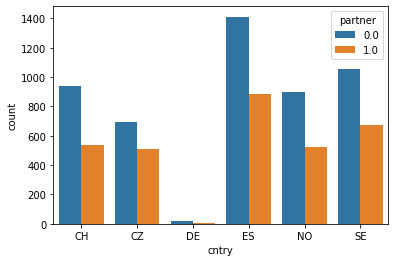

In [75]:
sns.countplot(df.cntry, hue=df.partner-1)
plt.show()

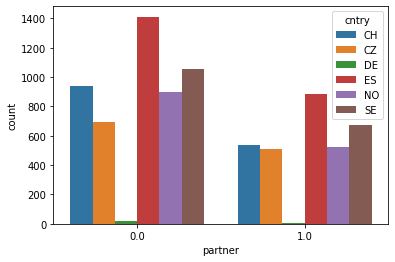

In [77]:
sns.countplot(df.partner-1, hue=df.cntry)
plt.show()

Pretty decent amount of variation between countries, also the difference within countries appears to be different.

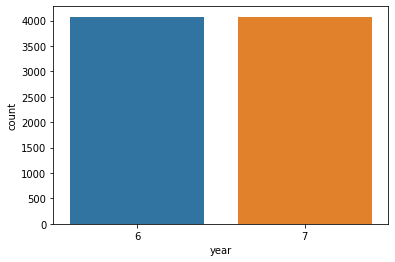

In [97]:
sns.countplot(df.year)
plt.show()

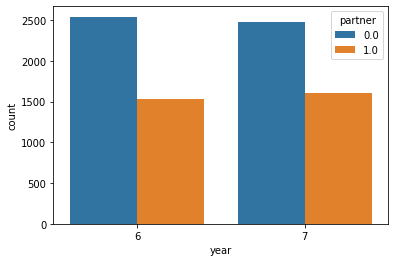

In [96]:
sns.countplot(df.year, hue=df.partner-1)
plt.show()

The distribution for year 6 vs year 7 don't seem to lend very much information to the target (they are essentially the same for each year).

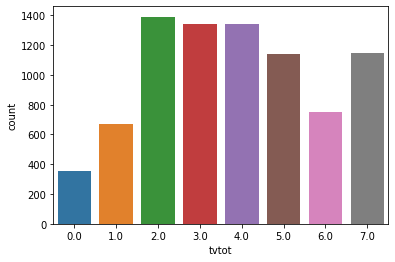

In [99]:
sns.countplot(df.tvtot)
plt.show()

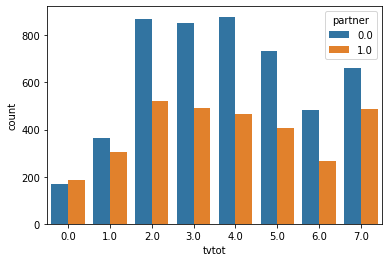

In [107]:
sns.countplot(df.tvtot, hue=df.partner-1)
plt.show()

Looks like tvtot is generally lower with a partner than without.

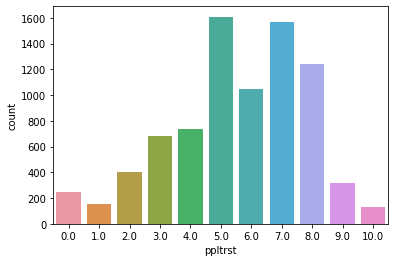

In [106]:
sns.countplot(df.ppltrst)
plt.show()

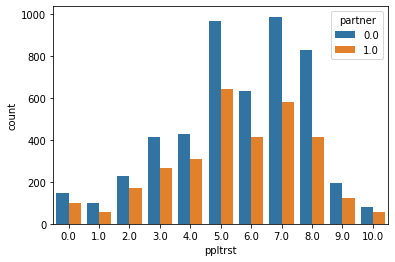

In [112]:
sns.countplot(df.ppltrst, hue=df.partner-1)
plt.show()

Looks like a pretty normal distribution above.

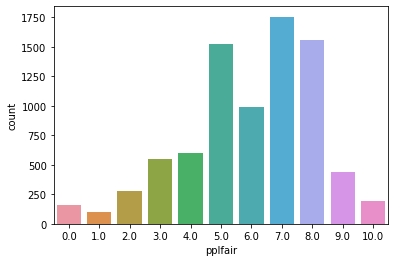

In [113]:
sns.countplot(df.pplfair)
plt.show()

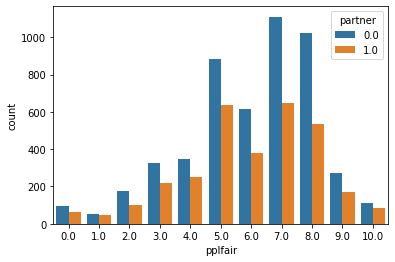

In [115]:
sns.countplot(df.pplfair, hue=df.partner-1)
plt.show()

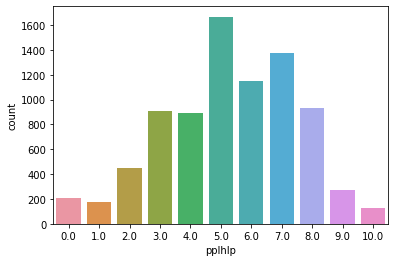

In [116]:
sns.countplot(df.pplhlp)
plt.show()

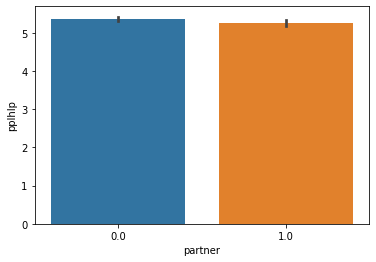

In [118]:
sns.barplot(df.partner-1, df.pplhlp)

In [123]:
df.nunique()

cntry         6
idno       3076
year          2
tvtot         8
ppltrst      11
pplfair      11
pplhlp       11
happy        11
sclmeet       7
sclact        5
gndr          2
agea         83
partner       2
dtype: int64

Some of these are definitely categorical variables - not continuous!

In [129]:
df.gndr.unique()

array([2., 1.])

In [126]:
df['year'] = df.year.astype('object')

In [130]:
df['gndr'] = (df.gndr - 1).astype('object')

In [158]:
df['partner'] = (df.partner - 1)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null float64
year       8147 non-null object
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null object
agea       8147 non-null float64
partner    8147 non-null object
dtypes: float64(9), object(4)
memory usage: 1.2+ MB


In [134]:
df.drop(columns='idno', inplace=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 12 columns):
cntry      8147 non-null object
year       8147 non-null object
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null object
agea       8147 non-null float64
partner    8147 non-null object
dtypes: float64(8), object(4)
memory usage: 1.1+ MB


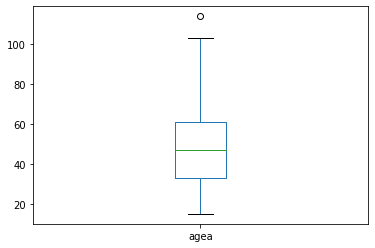

In [137]:
df.agea.plot(kind='box')

In [142]:
df.drop(index=8184, inplace=True)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8146 entries, 0 to 8593
Data columns (total 12 columns):
cntry      8146 non-null object
year       8146 non-null object
tvtot      8146 non-null float64
ppltrst    8146 non-null float64
pplfair    8146 non-null float64
pplhlp     8146 non-null float64
happy      8146 non-null float64
sclmeet    8146 non-null float64
sclact     8146 non-null float64
gndr       8146 non-null object
agea       8146 non-null float64
partner    8146 non-null object
dtypes: float64(8), object(4)
memory usage: 827.3+ KB


In [174]:
X = pd.get_dummies(df.drop(columns='partner'), drop_first=True).copy()
y = df.partner.copy()

In [175]:
X.shape

(8146, 15)

In [176]:
y.shape

(8146,)

Try with original base model with cleaner data...

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

In [178]:
params = dict(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=2,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=500,
               n_iter_no_change=None, presort='auto',
               random_state=None, subsample=1.0, tol=0.0001,
               validation_fraction=0.1, verbose=0,
               warm_start=False)

In [179]:
clf = GradientBoostingClassifier(**params)

In [188]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [186]:
cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)

array([0.75340599, 0.77520436, 0.74351978, 0.73396999, 0.75034106,
       0.74351978, 0.75443383, 0.74215553, 0.78308322, 0.75956284])

In [189]:
clf.score(X_test, y_test)

0.7558282208588957

Pretty much identical score here...

In [192]:
X.describe()

,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,agea,cntry_CZ,cntry_DE,cntry_ES,cntry_NO,cntry_SE,year_7,gndr_1.0
count,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000
mean,3.818930,5.574638,6.005156,5.321507,7.708200,5.215689,2.756077,47.253990,0.148171,0.003315,0.281365,0.174319,0.211760,0.500246,0.496440
std,2.008818,2.215718,2.120258,2.166347,1.720757,1.438745,0.901423,18.303081,0.355291,0.057480,0.449693,0.379407,0.408581,0.500031,0.500018
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,61.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,103.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [193]:
y.describe()

count    8146.000000
mean        0.384606
std         0.486532
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: partner, dtype: float64

There are many more 0 partners than 1 partners...class imbalance much?

In [228]:
def smote_clf_test(smote, clf):
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    clf.fit(X_train_smote, y_train_smote)
    print('CV10_mean:', cross_val_score(clf, X_train_smote, y_train_smote, cv=10, n_jobs=-1).mean())
    print('TestScore:', clf.score(X_test, y_test))
    print(confusion_matrix(y_test, clf.predict(X_test)))

In [229]:
smote_clf_test(SMOTE(sampling_strategy=1), clf)

CV10_mean: 0.7941559710093966
TestScore: 0.7521472392638037
[[448  43]
 [159 165]]


Looks like this isn't the best at predicting true positives (maybe we should oversample further?)

In [230]:
smote_clf_test(SMOTEENN(sampling_strategy=1), clf)

CV10_mean: 0.9232248494294619
TestScore: 0.7165644171779141
[[385 106]
 [125 199]]


That increased the true positives, but also ended up doing worse on the true negatives, unfortunately...don't think SMOTE will help too much more, let's tamper with parameters.

In [238]:
clf.loss = 'exponential'
smote = SMOTE(sampling_strategy=1)

In [239]:
smote_clf_test(smote, clf)

CV10_mean: 0.7959231963898494
TestScore: 0.7595092024539877
[[451  40]
 [156 168]]


Looks like it did a little bit better, still marginal, let's mess with depth.

In [241]:
clf.n_estimators = 1000

In [242]:
smote_clf_test(smote, clf)

CV10_mean: 0.7924964347809099
TestScore: 0.7484662576687117
[[442  49]
 [156 168]]


In [254]:
clf.max_depth = 2
clf.n_estimators = 500
clf.learning_rate = .2
clf.loss = 'exponential' #'deviance'

In [255]:
smote_clf_test(smote, clf)

CV10_mean: 0.7882958252749613
TestScore: 0.7411042944785277
[[441  50]
 [161 163]]


After trying a multitude of the above combinations, I am not sure if it gets much better than 75-76%...at least not using this model.